In [1]:
### Figure 2D for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
# Import the A549 gene level profiles & hits from the hit calling process then subset the gene level profiles for all hits 
# Download files described in README.md and add the folder address
df = pd.read_csv('(FOLDER_ADDRESS)/20200805_A549_WG_Screen_guide_normalized_feature_select_merged_median_ALLBATCHES___CP186___ALLWELLS_gene_aggregated.csv.gz').set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
comp_spef_hits = pd.read_csv('../Fig2_A_B/a549_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hits = pd.read_csv('../Fig2_A_B/a549_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
hit_list = list(comp_spef_hits.index) + list(whole_cell_hits.index)
df_hits = df.loc[hit_list]
genes = list(df_hits.index)

# Calculate correlation between all gene pairs
df_hits_corr = df_hits.T.corr()
df_hits_corr

Metadata_Foci_Barcode_MatchedTo_GeneCode,AARS,AARS2,ABCB1,ABCC12,ABCC6,ABHD17A,ABHD4,ABR,ACAD10,ACAN,...,ZNF576,ZNF76,ZNF778,ZNF780A,ZNF786,ZNF839,ZNHIT3,ZSCAN2,ZSCAN21,ZSCAN22
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
AARS,1.000000,0.255607,0.094741,-0.074100,-0.198776,-0.190858,0.125051,0.176390,0.250936,0.208159,...,-0.235094,0.236929,-0.028476,0.095379,-0.175051,0.190429,-0.062418,-0.238264,0.306606,0.293595
AARS2,0.255607,1.000000,0.127089,0.131509,0.150061,0.135126,0.220750,0.311434,0.274651,0.235460,...,0.069165,0.235440,0.172432,0.071878,0.034634,0.153182,0.147958,0.125842,0.243427,0.265304
ABCB1,0.094741,0.127089,1.000000,0.443105,0.267794,0.275234,0.214923,0.402774,0.483821,0.243783,...,0.425480,0.407542,0.488470,0.537275,0.339174,0.418023,0.413114,0.370980,0.337368,0.529633
ABCC12,-0.074100,0.131509,0.443105,1.000000,0.495492,0.450722,0.164259,0.396323,0.385195,0.207688,...,0.476174,0.148682,0.591893,0.267116,0.620811,0.195369,0.400124,0.551274,0.105565,0.380664
ABCC6,-0.198776,0.150061,0.267794,0.495492,1.000000,0.493531,0.084518,0.251971,0.238840,0.209427,...,0.533477,0.006584,0.333173,0.125433,0.569382,0.113048,0.340324,0.570429,-0.108798,0.107417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF839,0.190429,0.153182,0.418023,0.195369,0.113048,0.120532,0.309167,0.385649,0.407247,0.171039,...,0.178347,0.420856,0.302968,0.472219,0.112769,1.000000,0.298086,0.228849,0.384037,0.433667
ZNHIT3,-0.062418,0.147958,0.413114,0.400124,0.340324,0.410062,0.149795,0.325924,0.363168,0.135369,...,0.472670,0.299504,0.453885,0.310511,0.404431,0.298086,1.000000,0.444755,0.144863,0.407346
ZSCAN2,-0.238264,0.125842,0.370980,0.551274,0.570429,0.570585,0.257469,0.374547,0.329747,0.139286,...,0.630317,0.082610,0.515996,0.219444,0.610559,0.228849,0.444755,1.000000,0.008867,0.245033


In [3]:
# Import predicted protein links from v11.5 of STRING (9606.protein.links.v11.5.txt.gz) as well as the metadata (9606.protein.info.v11.5.txt.gz)
# Then parse the data into a dataframe
ppi_data = pd.read_csv('../Input_files/9606.protein.links.v11.5.txt.gz',sep = ' ')
p_names = pd.read_csv('../Input_files/9606.protein.info.v11.5.txt.gz',sep = '\t')

p_names_dic = {p_names.iloc[i]['#string_protein_id']:p_names.iloc[i]['preferred_name'] for i in range(len(p_names))}

p1 = list(ppi_data.protein1)
p2 = list(ppi_data.protein2)
score = list(ppi_data.combined_score)

p1_named = [p_names_dic.get(item)  for item in p1]
p2_named = [p_names_dic.get(item)  for item in p2]

ppi_data_name = pd.DataFrame(list(zip(p1_named, p2_named, score)),
               columns =['protein1', 'protein2','combined_score'])
ppi_data_name

,protein1,protein2,combined_score
0,ARF5,PDE1C,155
1,ARF5,PAK2,197
2,ARF5,RAB36,222
3,ARF5,RAPGEF1,181
4,ARF5,SUMO3,270
...,...,...,...
11938493,OR6Q1,OR5D13,213
11938494,OR6Q1,OR5B3,151
11938495,OR6Q1,KRTAP19-2,181
11938496,OR6Q1,OR4D6,154


In [4]:
# Subset the STRING predicted protein links to A549 WGS hits
ppi_data_name_hits = ppi_data_name[ppi_data_name['protein1'].isin(genes) & ppi_data_name['protein2'].isin(genes)]
ppi_data_name_hits

,protein1,protein2,combined_score
5115,HS3ST1,STT3B,214
5119,HS3ST1,GPC2,950
5130,HS3ST1,RPRM,206
5137,HS3ST1,SEMA4F,169
5142,HS3ST1,CHST5,354
...,...,...,...
11937364,MUC5AC,KIT,218
11937367,MUC5AC,MSH2,223
11937379,MUC5AC,TRNAU1AP,207
11937386,MUC5AC,MPST,163


In [5]:
# Catalogue all correlations
corr_dic = {}
for gene1 in genes:
    for gene2 in genes:
        if len(frozenset([gene1,gene2])) == 1 :
            continue
        else:    
            corr_dic[frozenset([gene1,gene2])]=(df_hits_corr.loc[gene1,gene2])
        
print('Overall number of paired correlation ' , len(corr_dic))

Overall number of paired correlation  6641190


In [6]:
# Determine min, max, intervals for profile correlations
corr_min = min(corr_dic.values())
corr_max = max(corr_dic.values())   
inteval = (corr_max-corr_min)/6
print(corr_min,corr_max,inteval)

-0.6776187447420516 0.8039289575133693 0.24692461704257015


In [7]:
# Bin the correlations into 6 categories 
results = ppi_data_name_hits.copy(deep=True).reset_index(drop=True)
results["correlation"] = ''
results["correlation_bin"] = ''

bins = [-0.81,-0.54,-0.27,0,0.27,0.54,0.81]
for i in range(len(results)):
    gene1 = results.iloc[i]['protein1']
    gene2 = results.iloc[i]['protein2']
    corr_value = corr_dic[frozenset([gene1,gene2])]
    results.at[i , 'correlation'] = corr_value
    if corr_value > bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[5]} to {bins[6]}'
    elif corr_value > bins[4] and corr_value <= bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[4]} to {bins[5]}'
    elif corr_value > bins[3] and corr_value <= bins[4]:
        results.at[i , 'correlation_bin'] = f'{bins[3]} to {bins[4]}'
    elif corr_value > bins[2] and corr_value <= bins[3]:
        results.at[i , 'correlation_bin'] = f'{bins[2]} to {bins[3]}'
    elif corr_value > bins[1] and corr_value <= bins[2]:
        results.at[i , 'correlation_bin'] = f'{bins[1]} to {bins[2]}'
    elif corr_value <= bins[1]:
        results.at[i , 'correlation_bin'] = f'{bins[0]} to {bins[1]}'
results

,protein1,protein2,combined_score,correlation,correlation_bin
0,HS3ST1,STT3B,214,0.188425,0 to 0.27
1,HS3ST1,GPC2,950,0.426876,0.27 to 0.54
2,HS3ST1,RPRM,206,0.220895,0 to 0.27
3,HS3ST1,SEMA4F,169,0.191028,0 to 0.27
4,HS3ST1,CHST5,354,0.324385,0.27 to 0.54
...,...,...,...,...,...
682959,MUC5AC,KIT,218,0.003037,0 to 0.27
682960,MUC5AC,MSH2,223,0.244945,0 to 0.27
682961,MUC5AC,TRNAU1AP,207,0.028972,0 to 0.27
682962,MUC5AC,MPST,163,0.208043,0 to 0.27


/opt/anaconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


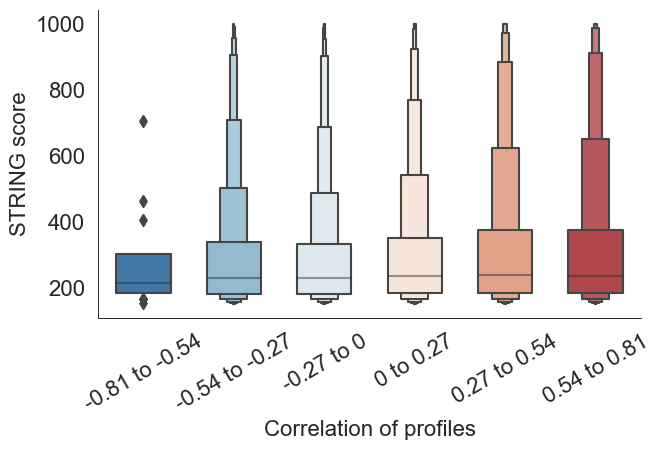

In [8]:
# Plot STRING score X gene pair correlation for Fig 2D
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7})

fig, ax = plt.subplots(figsize=(7,4))
order = [f'{bins[0]} to {bins[1]}',f'{bins[1]} to {bins[2]}',f'{bins[2]} to {bins[3]}',f'{bins[3]} to {bins[4]}',f'{bins[4]} to {bins[5]}',f'{bins[5]} to {bins[6]}']

flierprops = dict(markerfacecolor='white', markersize=0.1, linestyle='none')
sns.boxenplot(data=results,
            x = 'correlation_bin',
            y = 'combined_score', 
            #k_depth = 'trustworthy',
            #whis = [10, 90], 
            #flierprops = flierprops,
            order=order, 
            width = 0.6,
            palette = 'RdBu_r',
            ax=ax)

ax.set_xlabel('Correlation of profiles',size=16)
ax.set_ylabel('STRING score',size=16)
ax.tick_params(axis='both', which='major', labelsize=14)

labels = [item for item in ax.get_yticks()]
ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)
ax.set_xticklabels(order, size=16,rotation=30)

sns.despine(top = True,left=False,bottom=False)



fig.savefig('Fig2_D_A549_STRING_gene_pair_correlation_score.png', 
            dpi=300,
            facecolor='w', 
            edgecolor='w', 
            bbox_inches='tight')
plt.show()